## DL Part 2-2. CNN : Convolution Neural Network

In [ ]:
# for google colab
%tensorflow_version 2.x

In [ ]:
2차원, 3차원 배열
- Height * Width * Channel(Color)
- Channel : 0, 1, 3, 4

Color Space(색 공간)
- Gray Scale
  - 2차원 : Height * Width
  - 3차원 : Height * Width * 1
- Color Scale
  - 3차원 : Height * Width * 3
  - 3차원 : Height * Width * 4
- 각 요소의 값 : 0 ~ 255

## 1.NumPy Array Image만들기

(120, 120)
(120, 120, 3)


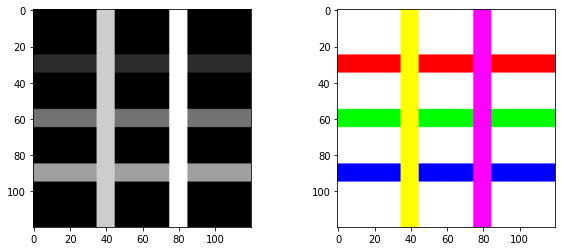

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gray = np.zeros((120,120), dtype=np.uint8)   # 120x120 2차원 배열 생성, 검은색 흑백 이미지
gray[25:35, :] = 45                          # 25~35행 모든 열에 45 할당 
gray[55:65, :] = 115                         # 55~65행 모든 열에 115 할당 
gray[85:95, :] = 160                         # 85~95행 모든 열에 160 할당 
gray[:, 35:45] = 205                         # 모든행 35~45 열에 205 할당 
gray[:, 75:85] = 255      
print(gray.shape)

rgb = np.full((120,120, 3), fill_value=(255,255,255), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
rgb[25:35, :] = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 빨강색 할당 
rgb[55:65, :] = [0, 255, 0]                     # 55~65행 모든 열에 [0,255,0], 초록색 할당 
rgb[85:95, :] = [0,0,255]                       # 85~95행 모든 열에 [0,0,255], 파랑색 할당 
rgb[:, 35:45] = [255,255,0]                     # 모든행 35~45 열에 [255,255,0], 하늘색 할당 
rgb[:, 75:85] = [255,0,255]      
print(rgb.shape)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.show()

## 2.Convolutional Layer 이해

- Convolution Layer와 Pooling Layer로 구성
- **Convolutional Layer는 "Feature Extraction"을 수행하는 Layer**
  - 1개 이미지에 포함된 Feature가 "너무" 많음
  - 1000 $\times$ 1000 image는 1,000,000 개의 parameter를 갖음
  - 위의 이미지에 size가 10 $\times$ 10 인 Filter를 100번 사용해 Convolution+ Pooling하면 10,000개의 parameter로 줄어들게 됨
- 참조 1 : ```https://developer.nvidia.com/discover/convolution```
- 참조 2 : ```https://demonstrations.wolfram.com/```
   - convolution : ```https://demonstrations.wolfram.com/search.html?query=convolution```

### 2-01. Convolution 연산


#### 2-01-1. Conv2D
- keras image shape : (batch, height, width, channel)
- shape : (N, H, W, C)
  - N : number of images(samples)
  - H : Height of the image
  - W : Width of the image
  - C : Channel(Color) count of the image
- filter : 커널 형태 설정
  - shape : (height, width, in_channel, out_channel)


input img: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
input shape: (1, 3, 3, 1)
x.shape = (1, 3, 3, 1)
filter:(2, 2, 1, 1)
[[[[1.0]], [[1.0]]], [[[1.0]], [[1.0]]]]
filtered:(1, 2, 2, 1)
[[[[8.0], [12.0]], [[20.0], [24.0]]]]


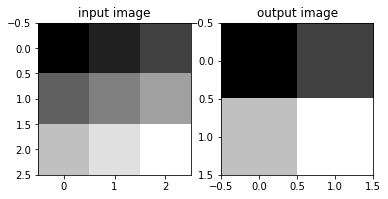

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 이미지 생성 및 표시
img = np.arange(9).reshape(3,3)
print(f'input img: \n {img}')
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('input image')

# 이미지를 keras 형식으로 변경 1개의 3*3 흑백 이미지
x = np.float32(img.reshape(1,3,3,1))
print(f'input shape: {x.shape}')

# filter 1개, kernel 크기 2, stride 1
filters, kernel_size, stride = 1, 2, 1

# filter shape (H, W, in_channel, out_channel) (2, 2, 1, 1)
def kerner_init(shape, dtype):
  filter = tf.constant(1, shape=shape, dtype=dtype)
  print(f'filter:{filter.shape}\n{filter.numpy().tolist()}')
  return filter

conv2d = tf.keras.layers.Conv2D(filters, kernel_size,
                                kernel_initializer=kerner_init,
                                input_shape=(3,3,1))
print(f'x.shape = {x.shape}')
filterd = conv2d(x) #gray (120, 120)
print(f'filtered:{filterd.shape}\n{filterd.numpy().tolist()}')
out = filterd.numpy().reshape(2,2)
plt.subplot(1,2,2)
plt.imshow(out, cmap='gray')
plt.title('output image')
plt.show()

#### 2-01-2. Conv2D로 Edge 검출

- 다양한 필터 : https://github.com/BaekKyunShin/OpenCV_Project_Python/tree/master/06.filter

In [ ]:
!wget -O tkv.jpg http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Ftkv.jpg

--2020-12-15 19:22:08--  http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Ftkv.jpg
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44284 (43K) [image/jpeg]
Saving to: ‘tkv.jpg’

tkv.jpg             100%[===================>]  43.25K   111KB/s    in 0.4s    

2020-12-15 19:22:09 (111 KB/s) - ‘tkv.jpg’ saved [44284/44284]



kernel shape:  (3, 3, 1, 2)
shape of input: (1, 444, 400, 1)
shape of conved: (1, 444, 400, 2)


True

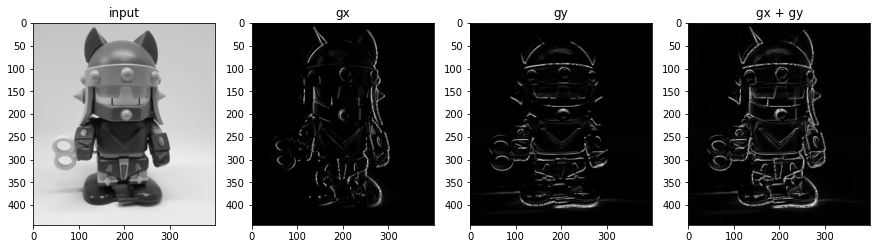

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

filename = 'tkv.jpg'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

def edge_kernel_init(shape, dtype):
  # 소벨 필터(Sobel Filter) : 중심 픽셀의 차분 비중을 두 배로 준 필터, x, y, 대각선 방향의 경계 검출에 모두 강함
  # cv2.Sobel() 함수로도 제공됨
  # x 방향 미분 커널 
  gxk = np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]]).reshape(3,3,1)
  # y 방향 미분 커널 
  gyk = np.array([[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]]).reshape(3,3,1)
  kernel = np.stack((gxk, gyk), axis=3)
  print("kernel shape: ", kernel.shape)     
  return tf.constant(kernel, dtype=dtype)

filters=2
ksize = 3
edge_conv = tf.keras.layers.Conv2D(filters, ksize, kernel_initializer=edge_kernel_init,
                                   input_shape=(h,w,1), padding="same", activation='relu')
gxy = edge_conv(x).numpy()
print('shape of input:', x.shape)
print('shape of conved:', gxy.shape)
#gxy[gxy < 0 ]=0  #음수처리, relu와 같은 원리, Conv2D(activation=None)과 비교해 보세요.
gx = gxy[..., 0].reshape(h,w).astype(np.uint8)
gy = gxy[..., 1].reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title("input")
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.title("gx")
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.title("gy")
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')
plt.title("gx + gy")

cv2.imwrite(filename[:-4]+'_filtered.jpg', gx+gy)

### 2-02. MaxPooling 연산
-  Pooling을 이용한 특징 축소 사례 1
<video controls="controls" src="./assets/Top_breeder.mp4" width=640 height=480></video>
   - 출처 : https://www.youtube.com/watch?v=f1fXCRtSUWU

- Pooling을 이용한 특징 축소 사례 2
<video controls="controls" src="./assets/Avatar.mp4" width=640 height=480></video>
   - 출처 :https://www.youtube.com/watch?v=U1KiC0AXhHg

#### 2-02-1. MaxPool2D

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
(1, 2, 2, 1) [[[[4.0], [5.0]], [[7.0], [8.0]]]]


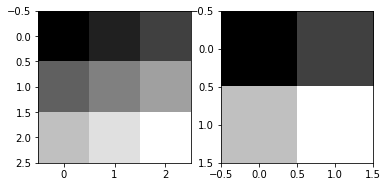

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

x = img.reshape(1,3,3,1)
ksize = (2,2)  
strides = 1    

maxpool = tf.keras.layers.MaxPool2D(ksize, strides, padding='VALID')
pooled = maxpool(x).numpy()

print(pooled.shape, pooled.tolist())
plt.subplot(1,2,2)
plt.imshow(pooled.reshape(2,2), cmap='gray')
plt.show()

#### 2-02-2. MaxPool2D로 특징 검출

cv2 img shape : (444, 400)
(1, 444, 400, 1)
(1, 44, 40, 1)
(44, 40)


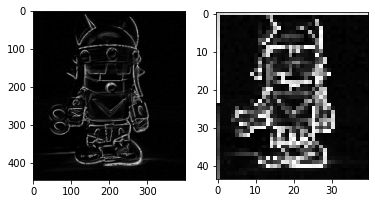

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2
filename = 'tkv_filtered.jpg'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
print(f'cv2 img shape : {img.shape}')
(h,w) = img.shape[:2]

x = np.float32(img.reshape(1,h,w,1))
print(x.shape)

ksize = (5,5)
strieds = 10
pooled = tf.keras.layers.MaxPool2D(ksize, strieds)(x)
pooled = pooled.numpy()
print(pooled.shape)
pooled = pooled.squeeze()
print(pooled.shape)
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(pooled, cmap='gray')

## 3.MNIST 숫자 손글씨 인식

### 3-01. 간단한 MNIST 모델 

In [31]:
import tensorflow as tf
import numpy as np

n_input = 28*28
#n_L1 = 300
#n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f'shape of data : X_train = {X_train.shape}, X_test = {X_test.shape}')

# 0~1의 크기로 만듦
X_train = X_train/255.0
X_test = X_test/255.0
# shape  조정
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

11493376/11490434 [==============================] - 0s 0us/step
shape of data : X_train = (60000, 28, 28), X_test = (10000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)              

In [ ]:
# Conv2D(32, 3, activation='relu', input_shape=(28,28,1))
# - filters : 32
# - kernel_size : 3

### 3-02. LeNet-5 - MNIST 모델 
- Yann Andre LeCun(얀 르쿤)에 의해 제안됨
  - Professor of New York Univ
- LeNet : 1998, 손글씨 숫자 인식을 목표로 생성
  - LeNet 1, 4, 5 있음
  


- LeNet-5

  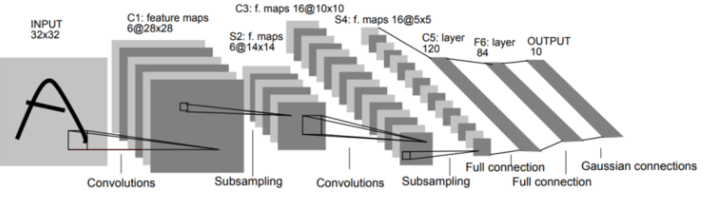

- LeNet-5 summary
 
  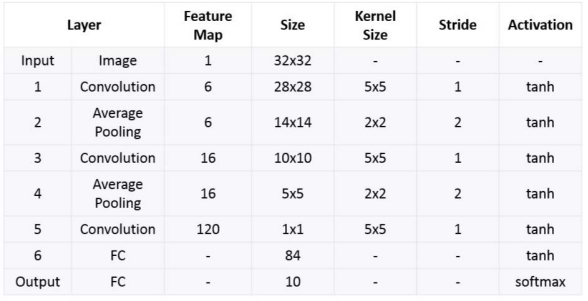

In [ ]:
#LeNet-5 에서는 (32,32) image를 사용하였지만, 제공되는 dataset은 (28, 28) 임

In [36]:
import tensorflow as tf
import numpy as np

def make_LeNet(input_shape=(32, 32,1), output=10):
    padding = 'valid'
    if input_shape[0] < 32:
        padding = 'same'
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, 5, padding=padding, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, 5, activation='tanh'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(120, 5, activation='tanh'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(84, activation='tanh' ), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

model = make_LeNet()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_4 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [46]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
shapes = [ x.shape for x in (X_train, y_train, X_test, y_test) ]
display(shapes, X_train.max(), X_train.min())

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

255

0

In [37]:
# 데이터 가져오기
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# 값 0~1로 보정
X_train = X_train/255.0
X_test = X_test/255.0
# shape 변경
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# validataion 설정
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = make_LeNet(input_shape=(28,28,1))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Epoch 1/10
550/550 [==============================] - 2s 3ms/step - loss: 0.5569 - accuracy: 0.8331 - val_loss: 0.0741 - val_accuracy: 0.9776
Epoch 2/10
550/550 [==============================] - 2s 3ms/step - loss: 0.0873 - accuracy: 0.9743 - val_loss: 0.0573 - val_accuracy: 0.9848
Epoch 3/10
550/550 [==============================] - 2s 3ms/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0463 - val_accuracy: 0.9878
Epoch 4/10
550/550 [==============================] - 2s 3ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0437 - val_accuracy: 0.9874
Epoch 5/10
550/550 [==============================] - 2s 3ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0433 - val_accuracy: 0.9876
Epoch 6/10
550/550 [==============================] - 2s 3ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0431 - val_accuracy: 0.9890
Epoch 7/10
550/550 [==============================] - 2s 3ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0353 - val_accuracy: 0.9918
Epoch 

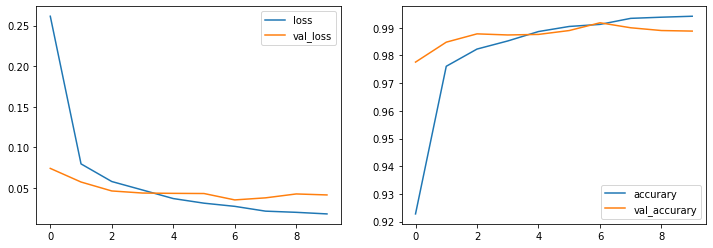

In [38]:
import matplotlib.pyplot as plt

def drawPlot(history):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label="loss")
    plt.plot(history.history['val_loss'], label="val_loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],  label="accurary")
    plt.plot(history.history['val_accuracy'], label="val_accurary")
    plt.legend()
    plt.show()
drawPlot(history)

### 3-03. 모델 저장, 불러오기

In [40]:
from tensorflow.keras.models import Sequential, save_model, load_model

# 생성된 모델 저장하기
filepath = './mnist_model'
save_model(model, filepath)
print(filepath, 'Saved')

INFO:tensorflow:Assets written to: ./mnist_model/assets
./mnist_model Saved


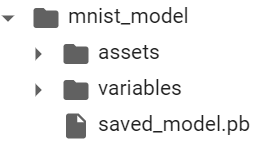

In [42]:
# 저장된 모델 가져오기
model = load_model(filepath, compile=True)
print('model Loaded')

model Loaded


### 3-04. 모델 사용

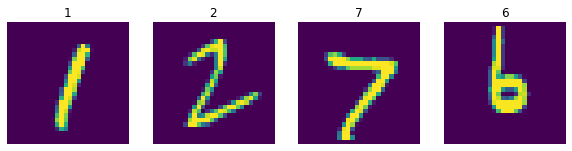

In [59]:
# 예측해볼 데이터 생성(추출)
import matplotlib.pyplot as plt
import numpy as np

use_samples = [5, 38, 4747, 6020]
samples_to_predict=[]

# 샘플 출력해 보기
plt.figure(figsize=(10, 4))
for n, sidx in enumerate(use_samples, start=1):
    reshaped_img = X_test[sidx].reshape((28, 28))   # (image_width, image_height)
    plt.subplot(1, len(use_samples), n)
    plt.imshow(reshaped_img)
    plt.title(f'{y_test[sidx]}')
    plt.axis('off')    
    samples_to_predict.append(X_test[sidx])
plt.show()

In [64]:
# numpy array로 변경  (4, 28, 28, 1)로 생성해야 함
samples_to_predictR = np.array(samples_to_predict)[..., np.newaxis]
print(samples_to_predictR.shape)

# 예측 실행
pred = model.predict(samples_to_predictR)
#print(pred)
classes = np.argmax(pred, axis=1)
print(classes)

(4, 28, 28, 1)
[[8.21467347e-06 9.99548495e-01 1.18729076e-06 7.64195136e-07
  1.52797220e-05 1.83621395e-07 1.14484784e-07 2.73295882e-04
  1.49390602e-04 3.18051389e-06]
 [2.61968694e-06 3.30328039e-04 9.98710990e-01 8.18359968e-06
  3.92725468e-07 4.32728484e-08 2.10423514e-06 9.40408849e-04
  4.81729467e-06 1.91473148e-08]
 [3.19899783e-07 5.65304299e-06 3.37998040e-06 1.10279943e-04
  3.69875888e-05 3.84977000e-07 2.52320387e-10 9.98939455e-01
  3.25606294e-07 9.03169508e-04]
 [1.87373498e-05 1.27150358e-07 5.61923969e-07 5.47532579e-07
  9.65832214e-08 1.91586932e-05 9.99957919e-01 7.16325277e-10
  2.66385700e-06 2.72352256e-08]]
[1 2 7 6]


## 4.Using Pre-trained Model
- Keras Pre-trained Models : ImageNet 1000가지 class로 훈련된 모델 제공



### 4-01. VGG16 사용

- All prepared : https://keras.io/api/applications/
- VGG16 : https://keras.io/api/applications/vgg/#vgg16-function

In [2]:
from tensorflow.keras.applications import VGG16

IMG_SIZE = 224
# weights = 'imagenet' - 미리 학습된 weight를 사용하겠다고 하는 것
vgg16 = VGG16(weights='imagenet',
              include_top=True,  # 3 fully-connected laters 를 포함하는지 아닌지에 대한 선택
              input_shape=(IMG_SIZE, IMG_SIZE, 3))  # 이미지 크기는 32이상일것, 채널은 3개
vgg16.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [3]:
!wget -O others.zip http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fothers.zip
!unzip others.zip

--2020-12-17 13:12:09--  http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fothers.zip
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3092382 (2.9M) [application/zip]
Saving to: ‘others.zip’

others.zip          100%[===================>]   2.95M  3.20MB/s    in 0.9s    

2020-12-17 13:12:10 (3.20 MB/s) - ‘others.zip’ saved [3092382/3092382]

Archive:  others.zip
   creating: others/
  inflating: others/dog.jpg          
  inflating: others/00000173.jpg     
  inflating: others/00000003.jpg     
  inflating: others/elephant.jpg     
  inflating: others/motorbike.jpg    
  inflating: others/cat.jpg          
  inflating: others/shue.jpg         
  inflating: others/00000108.jpg     
  inflating: others/car.jpg          
  inflating: others/flower.jpg       
  inflating: others/bicycle.jpg      
  inflating: others/hotdog1.jpg     

others/dog.jpg
40960/35363 [==================================] - 0s 0us/step
others/00000108.jpg
others/cat.jpg
others/00000003.jpg
others/00000173.jpg
others/car.jpg
others/bicycle.jpg
others/shue.jpg
others/hotdog1.jpg
others/motorbike.jpg
others/flower.jpg
others/elephant.jpg


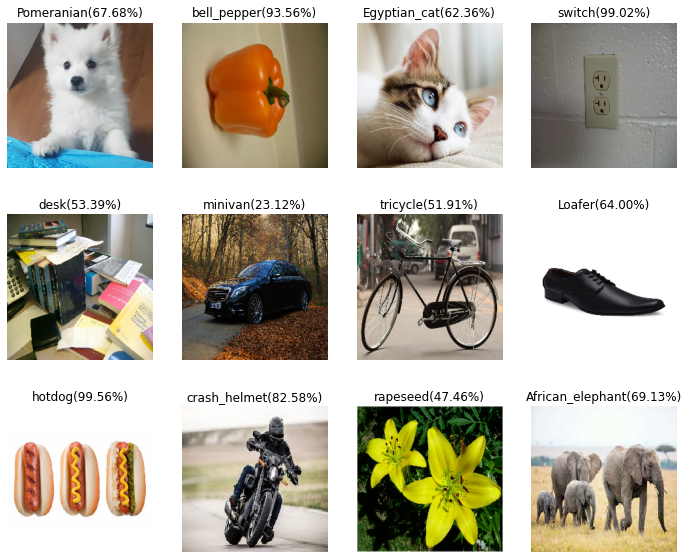

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
import glob
import matplotlib.pyplot as plt
import math

test_dir_path = 'others/*.*'   # windows에서는 'others\\*.*'
test_paths = glob.glob(test_dir_path)
cols = 4
rows = math.ceil(len(test_paths)/cols)

plt.figure(figsize=(12,10))
for i, path in enumerate(test_paths, start=1):
    print(path)
    img     = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = image.img_to_array(img)#, dtype=np.uint8) # img_arr's shape : (244, 244, 3)   
    img_arr = tf.expand_dims(img_arr, 0)                # 0번 axis에 추가  img_arr's shape : (1, 244, 244, 3) 
    pred = vgg16.predict(preprocess_input(img_arr))     # pred => ndarray   (1, 1000)  1000개 클래스에 대한 softmax
    decoded = decode_predictions(pred)[0]               # decode_predtions(pred) : 최상위 점수를 받은 5개 대한 정보 list shape이 (1, 5) => ('n03127747', 'crash_helmet', 0.82583606) 형태로 반환
    plt.subplot(rows, cols, i)
    plt.imshow(img)
    plt.title(f'{decoded[0][1]}({decoded[0][2]*100:.2f}%)')  # decoded[0] => 1등 확률
    plt.axis('off')
plt.show()

### 4-02. Transfer Learning
- 이미 학습된 모델을 재활용
- 새로 추가한 일부 층만 다시 재학습
- include_top = False 사용
* VGG16 loading for TL


#### 4-02-1. VGG16 가져오기

In [11]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
# 아래의 내용이 없음!

flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________

#### 4-02-2. VGG16 포함, 모델생성

In [68]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# 새로운 모델을 생성해서
model = models.Sequential()

# VGG16의 base를 넣음 (conv_base)
model.add(conv_base)
# 새롭게 Flatten, Dense를 넣음
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


#### 4-02-3. VGG16 학습 동결
- Pre-trained model에 대해 학습을 동결함

In [8]:
print('conv_base를 동결 전 학습 가중치 변수 층 수:', 
      len(model.trainable_weights))

conv_base를 동결 전 학습 가중치 변수 층 수: 30


In [69]:
# VGG16 학습동결
conv_base.trainable = False

In [10]:
print('conv_base를 동결 후 학습 가중치 변수 층 수:', 
      len(model.trainable_weights))

conv_base를 동결 후 학습 가중치 변수 층 수: 4


#### 4-02-4. Kaggle Dogs_Cats 준비

* https://www.kaggle.com/c/dogs-vs-cats/data
* 설치
    * `!pip install kaggle`

In [ ]:
#!pip install kaggle  # 이미 되어 있음

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'jaen11487'
os.environ['KAGGLE_KEY'] = '1e7109f613a54cba533ab49ab46927ff'
!kaggle competitions download -c dogs-vs-cats

 97% 264M/271M [00:01<00:00, 187MB/s]
100% 271M/271M [00:01<00:00, 200MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 79.2MB/s]
 96% 523M/543M [00:02<00:00, 220MB/s]
100% 543M/543M [00:02<00:00, 201MB/s]


##### Unzip,  Directory 구성


In [4]:
import zipfile
import os
dir_path = 'cat_dog'

In [5]:
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

with zipfile.ZipFile("train.zip" , "r") as zip_ref:
    zip_ref.extractall(dir_path)

In [6]:
sub_dirs = ['train', 'test']
label_dirs = ['cat', 'dog']
for sub_dir in sub_dirs:
    for label_dir in label_dirs:
        os.makedirs(os.path.join(dir_path, sub_dir, label_dir), exist_ok=True)

##### 준비된 디렉토리에 파일 복사
* test 디렉토리에 25% 할당

In [7]:
import glob
import random
import shutil

files = glob.glob(dir_path + '/train/*.jpg')
split_ratio = 0.25

for file in files:
    filename = os.path.basename(file)
    print('file copying...', file, end='\r')
    dst_dir = 'train'
    if random.random() < split_ratio :
        dst_dir = 'test'
    if filename.startswith('cat'):
        dst = os.path.join(dir_path, dst_dir, 'cat', filename)
    else :
        dst = os.path.join(dir_path, dst_dir, 'dog', filename)
    shutil.copyfile(file, dst)
print('copy done.')

copy done.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255) #검증 데이타, 증식 없음
train_generator = train_datagen.flow_from_directory(
        os.path.join(dir_path, 'train'), # 타깃 디렉터리
        target_size=(150, 150),# 모든 이미지의 크기를 150 × 150로 변경
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        os.path.join(dir_path, 'test'),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 18728 images belonging to 2 classes.
Found 6272 images belonging to 2 classes.


In [14]:
image_batch, label_batch = next(train_generator)
image_batch.shape, label_batch.shape

((20, 150, 150, 3), (20,))

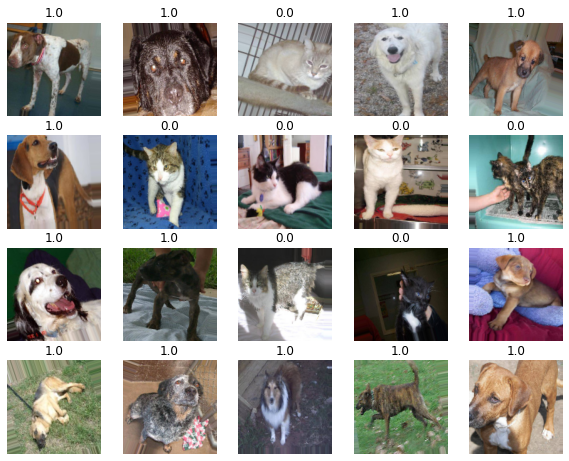

In [16]:
import matplotlib.pyplot as plt
image_batch, label_batch = next(train_generator)

plt.figure(figsize=(10,10))
for n in range(20):
    plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n])
    plt.axis('off')

##### 모델 생성

In [70]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
100/100 - 20s - loss: 0.5485 - acc: 0.7350 - val_loss: 0.4105 - val_acc: 0.8450
Epoch 2/30
100/100 - 19s - loss: 0.4194 - acc: 0.8265 - val_loss: 0.3331 - val_acc: 0.8560
Epoch 3/30
100/100 - 19s - loss: 0.3763 - acc: 0.8330 - val_loss: 0.3113 - val_acc: 0.8720
Epoch 4/30
100/100 - 19s - loss: 0.3448 - acc: 0.8536 - val_loss: 0.2946 - val_acc: 0.8810
Epoch 5/30
100/100 - 19s - loss: 0.3075 - acc: 0.8745 - val_loss: 0.2944 - val_acc: 0.8700
Epoch 6/30
100/100 - 19s - loss: 0.3149 - acc: 0.8585 - val_loss: 0.2610 - val_acc: 0.8860
Epoch 7/30
100/100 - 19s - loss: 0.3057 - acc: 0.8725 - val_loss: 0.2581 - val_acc: 0.8930
Epoch 8/30
100/100 - 19s - loss: 0.2816 - acc: 0.8815 - val_loss: 0.2520 - val_acc: 0.8960
Epoch 9/30
100/100 - 19s - loss: 0.3046 - acc: 0.8705 - val_loss: 0.2506 - val_acc: 0.8930
Epoch 10/30
100/100 - 19s - loss: 0.3000 - acc: 0.8735 - val_loss: 0.2631 - val_acc: 0.8890
Epoch 11/30
100/100 - 19s - loss: 0.2897 - acc: 0.8635 - val_loss: 0.2467 - val_acc: 0.90

In [19]:
loss_after,accuracy_after = model.evaluate(validation_generator)
print("Test Accuracy:{}".format(accuracy_after))

314/314 [==============================] - 23s 74ms/step - loss: 0.2182 - acc: 0.9082
Test Accuracy:0.9081632494926453


##### keras 모델 저장 (HDF5)
https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko

In [20]:
model.save('cats_and_dogs_small_3.h5')

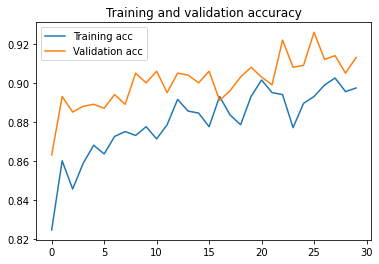

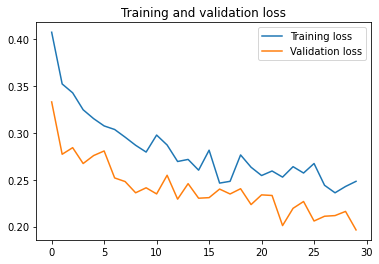

In [22]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training acc')
plt.plot(epochs, val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#### 4-02-5. VGGNet 개,고양이 분류 테스트

In [23]:
!wget -O pet.zip http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fpet.zip
!unzip pet.zip

--2020-12-17 20:22:47--  http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fpet.zip
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499472 (488K) [application/zip]
Saving to: ‘pet.zip’

pet.zip             100%[===================>] 487.77K   538KB/s    in 0.9s    

2020-12-17 20:22:48 (538 KB/s) - ‘pet.zip’ saved [499472/499472]

Archive:  pet.zip
   creating: pet/
  inflating: pet/dog.jpg             
  inflating: pet/dog3.jpg            
  inflating: pet/dog2.jpg            
  inflating: pet/cat2.jpg            
  inflating: pet/cat3.jpg            
  inflating: pet/pet4.jpg            
  inflating: pet/pet5.jpg            
  inflating: pet/cat.jpg             
  inflating: pet/pet6.jpg            
  inflating: pet/pet2.jpg            
  inflating: pet/pet3.jpg            
  inflating: pet/pet1.jpg            


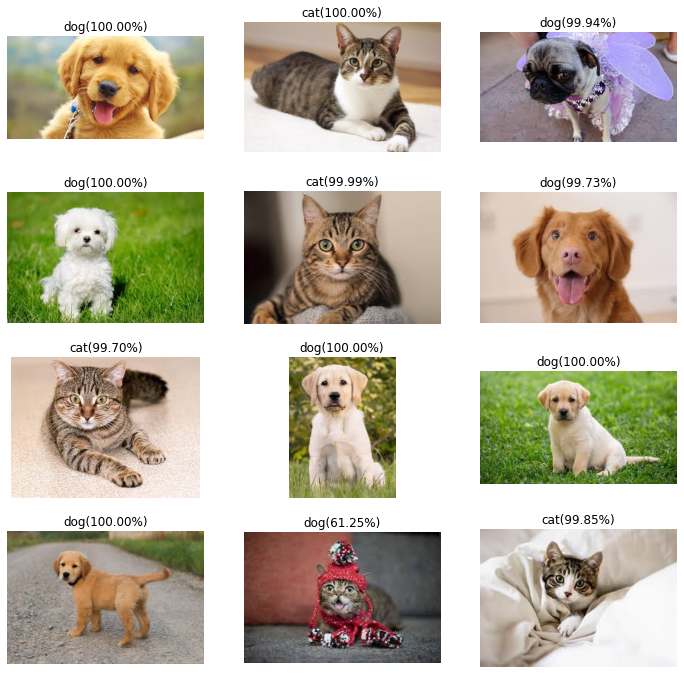

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2,glob,math,numpy as np
import matplotlib.pyplot as plt

pet_dir = 'pet/*.*'
labels = ['cat', 'dog']
IMG_SIZE = 150
model = tf.keras.models.load_model('cats_and_dogs_small_3.h5')
paths =  glob.glob(pet_dir)
plt.figure(figsize=(12,12))
for i, path in enumerate(paths) :
    img = cv2.imread(path)[..., ::-1]
    pet = img.copy().astype(np.float32)
    pet = cv2.resize(pet, (IMG_SIZE, IMG_SIZE))/255.0
    pet = np.expand_dims(pet, axis=0)
    pred = model.predict(pet)[0][0]   # 결과가 (1, 1) shape
    label, p = (0, 1-pred) if pred<0.5 else (1, pred)
    pet_name =  labels[label]
    plt.subplot(math.ceil(len(paths)/3), 3, i+1)
    plt.imshow(img)
    plt.title(f'{pet_name}({p *100:.2f}%)')
    plt.axis('off')